In [1]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)



# 폰트를 기본폰트로 설정
plt.rc('font', family='NanumBarunGothic')


Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import gdown
url='https://drive.google.com/uc?id=15xs6IfGMPxLkMPc3gMyR4TXkzYjhCPRw'
filename='mostSoldGames'
gdown.download(url, filename, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=15xs6IfGMPxLkMPc3gMyR4TXkzYjhCPRw
To: /content/mostSoldGames
100%|██████████| 1.36M/1.36M [00:00<00:00, 64.5MB/s]


'mostSoldGames'

In [3]:
import pandas as pd

dt = pd.read_csv(filename, encoding='utf-8', low_memory=False)
dt.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


해당 데이터를 활용하여, 세부 국가 데이터를 제외한 국제 데이터만 뽑아서 재배열한 다음, 그래프를 그려서 여러 주제로 만들지 생각함.

In [4]:
dt_onlyGL=dt.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
dt_onlyGL.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [5]:
dt_sorted=dt_onlyGL.sort_values(by=['Global_Sales'],ascending=[False])
dt_sorted.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


불필요한 정보인 일반등수, 북미, 유럽, 일본, 기타 판매수는 자르고, 글로벌 판매수를 기준으로 재배열함.

In [6]:
import numpy as np
dt_sorted2=dt_sorted.replace('N/A', np.nan)
dt_sorted2.head()


,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


해당 차트에 있는 'N/A'를 모두 NaN형으로 바꿔줌

In [7]:
rank=[]
rankNum=0
for x in range(0,16598):
  rankNum+=1
  rank.append(rankNum)


dt_sorted.insert(0,"GlobalRank",rank)
dt_sorted.head()

,GlobalRank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


이로써 글로벌 전체순위로 정렬하여, 국제적으로 다운로드한 순위를 확인할 수 있음.

남은 행들을 분석하여 그래프를 그려봄.
현재 분석할 수 있는 행은 플랫폼,년도,장르,퍼블리싱한 회사 4가지임.
이중 글로벌 판매수를 기준으로 '년도', '장르'를 분석해볼 것임.

In [8]:
dt_sorted.astype({'Year':'float32'})

,GlobalRank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...,...,...
16186,16594,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.01
16187,16595,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.01
16188,16596,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.01
16189,16597,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.01


년도를 float형식으로 재정의함. 이제 년도 행에는 모두 숫자가 들어가있음을 확인함.

년도를 문자열 형식으로 바꿔줌.

In [9]:
dt_sorted['Year'].replace(0,np.nan)
dt_sorted['Global_Sales'].replace(0,np.nan)

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16186     0.01
16187     0.01
16188     0.01
16189     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

자료가 없는것은 제외시켜야 하기에, NaN형식으로 바꿔줌.

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi']=100

맷플롯립 호출

In [11]:
dt_YG=dt_sorted[['Year','Genre','Global_Sales']]

dt_YG.sort_values(by=['Genre'],ascending=[False])
dt_YG.head()

,Year,Genre,Global_Sales
0,2006.0,Sports,82.74
1,1985.0,Platform,40.24
2,2008.0,Racing,35.82
3,2009.0,Sports,33.00
4,1996.0,Role-Playing,31.37


그래프를 그리기 위한 자료들만 뽑아 새로운 표를 만듬.

이제 그래프를 그려보자.

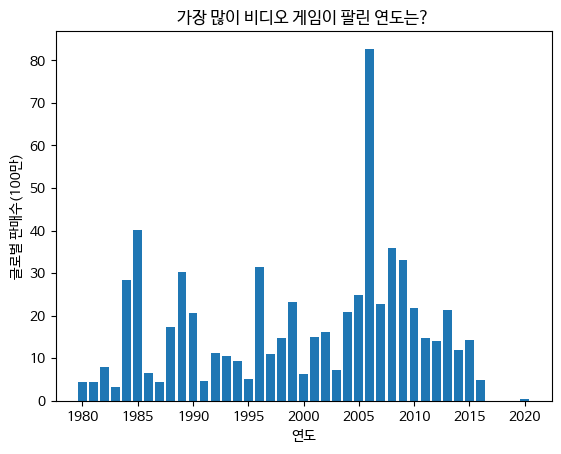

In [15]:
plt.bar(dt_YG['Year'],dt_YG['Global_Sales'])
plt.title('가장 많이 비디오 게임이 팔린 연도는?')
plt.xlabel('연도')
plt.ylabel('글로벌 판매수(100만)')
plt.show()

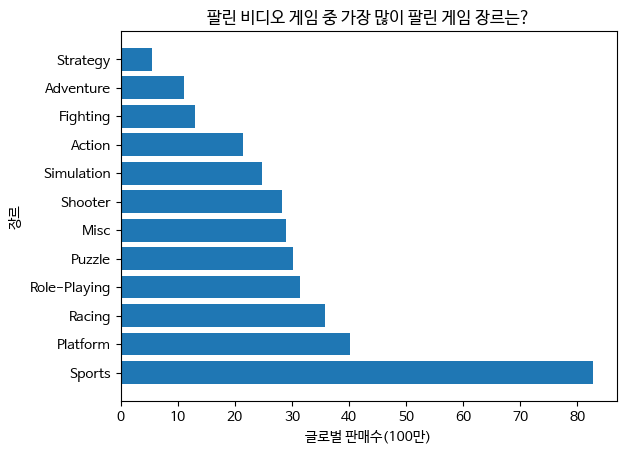

In [16]:
plt.barh(dt_YG['Genre'],dt_YG['Global_Sales'])
plt.title('팔린 비디오 게임 중 가장 많이 팔린 게임 장르는?')
plt.ylabel('장르')
plt.xlabel('글로벌 판매수(100만)')
plt.show()

이 그래프를 보며, 2006년에 게임이 가장 많이 팔렸고, 장르는 스포츠게임이 제일 많이 팔린 것으로 보인다.